# Handwritten Digits Classifier

<p align="center">
<img src="img/digits.gif">
</p>

The MNIST database contains binary images of **handwritten digits**. The original black and white images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. The images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.The database has a training set of 60,000 examples, and a test set of 10,000 examples. There are 10 classes (one for each of the 10 digits). **The task at hand is to train a model using the 60,000 training images and subsequently test its classification accuracy on the 10,000 test images**.

# 0.0. Imports 

In [1]:
# imports
import pandas     as pd
import numpy      as np

import matplotlib.pyplot as plt
import scikitplot        as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics         import accuracy_score
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model    import Perceptron
from sklearn.preprocessing   import MinMaxScaler

import warnings
warnings.filterwarnings( "ignore" )

## 0.1. Helper Functions

In [11]:
# Building and training a Multilayer Perceptron Model with hold-out method
def hold_out_mlp( hls, activation, solver, X_train, X_test, y_train, y_test ):
    
    # Building and training the model
    mlp = MLPClassifier( hidden_layer_sizes=hls, activation=activation, solver=solver, random_state=11 )
    mlp_trained = mlp.fit( X_train, y_train )
    
    # Predict
    y_pred = mlp_trained.predict( X_test )
    
    print('Performance with Hold-Out')
    print( 'Accuracy: ', accuracy_score( y_test, y_pred ) )
    
    # confusion matrix
    confusion_matrix( y_test, y_pred )
    
    return None  

# Building and training a Multilayer Perceptron Model with cross validation method
def cross_validation_mlp( hls, activation, solver, X, y):
    
    # Building model
    mlp = MLPClassifier( hidden_layer_sizes=hls, activation=activation, solver=solver, random_state=11 )
    
    # dictionary with the accuracies of each k fold
    results = { 'cv5_avg': [], 'cv5_std': [], 'cv7_avg': [], 'cv7_std': [], 'cv10_avg': [], 'cv10_std':[] }
    
    # cross validation
    for i, j, k in zip( [5, 7, 10], ['cv5_avg', 'cv7_avg', 'cv10_avg'], ['cv5_std', 'cv7_std', 'cv10_std'] ):
        
        cv_result = cross_val_score( mlp, X, y, cv=i, scoring='accuracy' )
        
        # Inserting accuracies in the dictionary
        results[j].append( cv_result.mean() )
        results[k].append( cv_result.std() )
    
    df = pd.DataFrame(results)
    
    print('Performance with Cross Validation')
    print(df)
    
    return None
    
# Building and training a Perceptron Model with hold-out method
def hold_out_perceptron( learning_rate, max_iter, penalty, X_train, X_test, y_train, y_test ):
    
    # Building and training the model
    perceptron = Perceptron( eta0=learning_rate, max_iter=max_iter, penalty=penalty, random_state=11 )
    perceptron_trained = perceptron.fit( X_train, y_train )
    
    # Predict
    y_pred = perceptron_trained.predict( X_test )
    
    print('Performance with Hold-Out')
    print( 'Accuracy: ', accuracy_score( y_test, y_pred ) )
    
    # confusion matrix
    confusion_matrix( y_test, y_pred )
    
    return None

# Building and training a Perceptron Model with cross validation method
def cross_validation_perceptron( learning_rate, max_iter, penalty, X, y):
    
    # Building model
    perceptron = Perceptron( eta0=learning_rate, max_iter=max_iter, penalty=penalty, random_state=11 )
    
    # dictionary with the accuracies of each k fold
    results = { 'cv5_avg': [], 'cv5_std': [], 'cv7_avg': [], 'cv7_std': [], 'cv10_avg': [], 'cv10_std':[] }
    
    # cross validation
    for i, j, k in zip( [5, 7, 10], ['cv5_avg', 'cv7_avg', 'cv10_avg'], ['cv5_std', 'cv7_std', 'cv10_std'] ):
        
        cv_result = cross_val_score( perceptron, X, y, cv=i, scoring='accuracy' )
        
        # Inserting accuracies in the dictionary
        results[j].append( cv_result.mean() )
        results[k].append( cv_result.std() )
    
    df = pd.DataFrame(results)
    
    print('Performance with Cross Validation')
    print(df)
    
    return None

# Plot confusion matrix
def confusion_matrix( y, predictions ):
    skplt.metrics.plot_confusion_matrix( y, predictions )
    plt.figure( figsize=(12, 8))
    plt.show()
    
    return None
                

## 0.2. Load data

In [3]:
# Load data
from mnist import MNIST

mndata = MNIST( 'datasets/images_handwritten_digits' )

image_train, label_train = mndata.load_training( )
image_test, label_test = mndata.load_testing( )

In [6]:
# View an image
index = random.randrange( 0, len( image_train ) ) 
print( mndata.display( image_train[index] ) )


............................
............................
............................
............................
............................
............................
............................
............@...............
.........@@@@@@@@..@@.......
.........@@@@@@@@@@@@@......
.......@@@@....@@@@@@.......
......@@@@........@@@.......
......@@.........@@@........
.................@@@........
................@@@@........
................@@@.........
...............@@@..........
...............@@@..........
..............@@@...........
..............@@@...........
.............@@@............
............@@@@............
............@@@.............
............@@@.............
............@@@.............
...........@@@..............
............@...............
............................


In [5]:
# Data transformation
image_train = pd.DataFrame( image_train )
image_test = pd.DataFrame( image_test )
label_train = pd.DataFrame( label_train )
label_test = pd.DataFrame( label_test )

**It may seem strange to join the data as it is already divided for training and testing, but the idea here is to separate a larger part of the data to train the model using the hold-out technique, and also use cross validation, in order to compare both training methods.**

In [6]:
# Joining image Dataframes
X = pd.concat( [image_train, image_test], ignore_index=True )

# Joining target Dataframes
y = pd.concat( [label_train, label_test], ignore_index=True )

# 1.0. Data description

## 1.1. Data dimensions

In [15]:
# Data dimensions of image dataframe
print( 'Number of rows: ', X.shape[0] )
print( 'Number of columns: ', X.shape[1] )

Number of rows:  70000
Number of columns:  784


In [16]:
# Data dimensions of target dataframe
print( 'Number of rows: ', y.shape[0] )
print( 'Number of columns: ', y.shape[1] )

Number of rows:  70000
Number of columns:  1


## 1.2. Data information

In [18]:
# Data types
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: int64(784)
memory usage: 418.7 MB


## 1.3. Check NA

In [20]:
# Checking missing values
X.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

# 2.0. Data Preparation

## 2.1. Normalization

In [9]:
# Data normalization
norm = MinMaxScaler()

X = pd.DataFrame( norm.fit_transform( X ) )

## 2.2. Split dataframe into training and test dataset

In [10]:
# Splitting data 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 11 )

# 3.0. Machine Learning Modelling

## 3.1. Multilayer Perceptron

In order to find the best hyperparameters that fit the dataset, eight different tests will be performed, varying the number of neurons and hidden layers, the activation function and the solver.

- One and two layers, with different numbers of neurons
- Activation function options: [ logistic, relu, tanh, identify]
- Solver options: [sgd, lbfgs, adam]

### Test 1

- A hidden layer with 15 neurons
- Activation function: logistic
- Solver: Stochastic gradient descent

Performance with Hold-Out
Accuracy:  0.9168095238095239


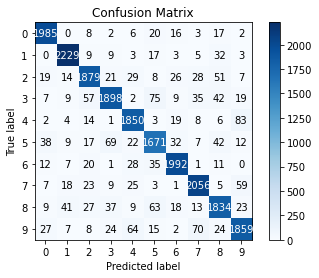

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg  cv7_std  cv10_avg  cv10_std
0  0.920214  0.004258  0.921986  0.00398  0.922957  0.005169


In [11]:
# Building MLP model with hold-out
hold_out_mlp( (15, ), 'logistic', 'sgd', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (15, ), 'logistic', 'sgd', X, y )

### Test 2

- Two hidden layers, with 15 and 10 neurons
- Activation function: relu
- Solver: lbfgs

Performance with Hold-Out
Accuracy:  0.936


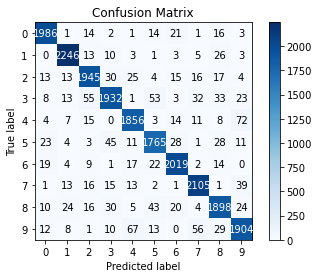

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg  cv7_std  cv10_avg  cv10_std
0  0.937671  0.003067  0.938629  0.00354  0.938186  0.004428


In [12]:
# Building MLP model with hold-out
hold_out_mlp( (15, 10,), 'relu', 'lbfgs', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (15, 10,), 'relu', 'lbfgs', X, y )

### Test 3

- Two hidden layers, with 20 and 10 neurons
- Activation function: tanh
- Solver: Stochastic gradient descent

Performance with Hold-Out
Accuracy:  0.9516190476190476


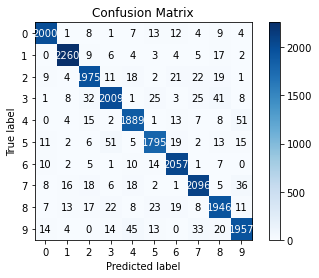

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.953386  0.002324  0.953871  0.003165    0.9546  0.003507


In [13]:
# Building MLP model with hold-out
hold_out_mlp( (20, 10), 'tanh', 'sgd', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (20, 10), 'tanh', 'sgd', X, y )

### Test 4

- Two hidden layers, with 20 and 15 neurons
- Activation function: identify
- Solver: adam

Performance with Hold-Out
Accuracy:  0.917047619047619


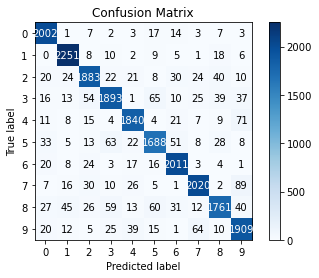

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.917271  0.005801  0.918329  0.005717  0.919329  0.006204


In [14]:
# Building MLP model with hold-out
hold_out_mlp( (20, 15), 'identity', 'adam', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (20, 15), 'identity', 'adam', X, y )

### Test 5

- One hidden layer, with 50 neurons
- Activation function: relu
- Solver: lbfgs

Performance with Hold-Out
Accuracy:  0.9663333333333334


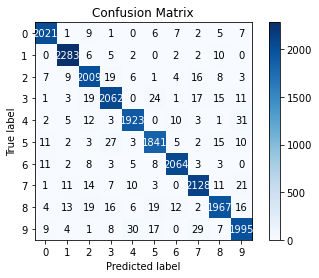

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.968714  0.002247  0.968157  0.002924  0.968843  0.002218


In [15]:
# Building MLP model with hold-out
hold_out_mlp( (50,), 'relu', 'lbfgs', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (50,), 'relu', 'lbfgs', X, y )

### Test 6

- One hidden layer, with 100 neurons
- Activation function: relu
- Solver: Stochastic gradient descent

Performance with Hold-Out
Accuracy:  0.9657619047619047


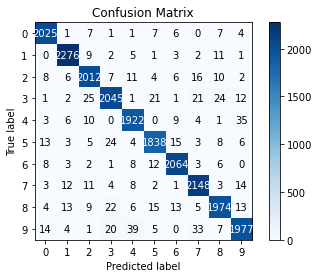

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.967343  0.002609  0.968229  0.002955  0.969129  0.003183


In [8]:
# Building MLP model with hold-out
hold_out_mlp( (100,), 'relu', 'sgd', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (100,), 'relu', 'sgd', X, y )

### Test 7 

- Two hidden layers, with 100 and 50 neurons
- Activation function: tanh
- Solver: lbfgs

Performance with Hold-Out
Accuracy:  0.9705238095238096


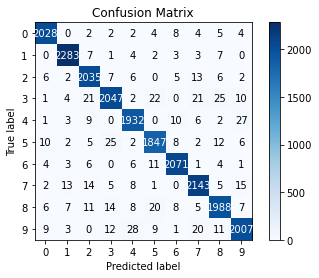

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.971771  0.002844  0.972371  0.001767  0.973314  0.003069


In [10]:
# Building MLP model with hold-out
hold_out_mlp( (100, 50,), 'tanh', 'lbfgs', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (100, 50,), 'tanh', 'lbfgs', X, y )

### Test 8 

- Two hidden layers, with 100 and 50 neurons
- Activation function: relu
- Solver: lbfgs

Performance with Hold-Out
Accuracy:  0.9743809523809523


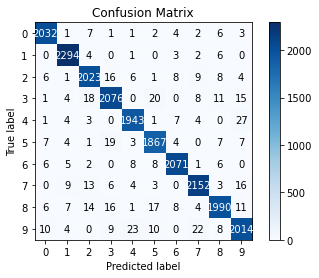

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.975371  0.002564  0.974857  0.002563  0.975786  0.002653


In [11]:
# Building MLP model with hold-out
hold_out_mlp( (100, 50,), 'relu', 'lbfgs', X_train, X_test, y_train, y_test )

# Building MLP model with cross validation
cross_validation_mlp( (100, 50,), 'relu', 'lbfgs', X, y )

### Results

In [31]:
results = {
    'Test': [1, 2, 3, 4, 5, 6, 7, 8],
    'First layer': [15, 15, 20, 20, 50, 100, 100, 100],
    'Second layer': ['-', 10, 10, 15, '-', '-', 50, 50],
    'Activation': ['logistic', 'relu', 'tanh', 'identify', 'relu', 'relu', 'tanh', 'relu'],
    'Solver': ['sgd', 'lbfgs', 'sgd', 'adam', 'lbfgs', 'sgd', 'lbfgs', 'lbfgs'],
    'Accuracy hold-out': [0.91, 0.93, 0.95, 0.91, 0.96, 0.96, 0.97, 0.97],
    'Accuracy cv5': [0.920214, 0.937671, 0.953386, 0.917271, 0.968714, 0.967343, 0.971771, 0.975371],
    'Accuracy cv7': [0.921986, 0.938629, 0.953871, 0.918329, 0.968157, 0.968229, 0.972371, 0.974857],
    'Accuracy cv10': [0.922957, 0.938186, 0.9546, 0.919329, 0.968843, 0.969129, 0.973314, 0.975786],
}

pd.DataFrame(results)

,Test,First layer,Second layer,Activation,Solver,Accuracy hold-out,Accuracy cv5,Accuracy cv7,Accuracy cv10
0,1,15,-,logistic,sgd,0.91,0.920214,0.921986,0.922957
1,2,15,10,relu,lbfgs,0.93,0.937671,0.938629,0.938186
2,3,20,10,tanh,sgd,0.95,0.953386,0.953871,0.954600
3,4,20,15,identify,adam,0.91,0.917271,0.918329,0.919329
4,5,50,-,relu,lbfgs,0.96,0.968714,0.968157,0.968843
5,6,100,-,relu,sgd,0.96,0.967343,0.968229,0.969129
6,7,100,50,tanh,lbfgs,0.97,0.971771,0.972371,0.973314
7,8,100,50,relu,lbfgs,0.97,0.975371,0.974857,0.975786


## 3.2. Perceptron

In the perceptron, 10 different tests will be made, varying the learning rate,  number of epochs and the penalty used.

- Scale learning rate = [ 0.0001, 0.001, 0.01, 0.1, 1 ]
- Scale number of epochs = [ 100, 1000, 10000 ]
- Penalty options = [ 'l1', 'l2', 'elasticnet' ]

### Test 1

- Learning rate: 0.0001
- Number of epochs: 1000
- Penalty: None

Performance with Hold-Out
Accuracy:  0.9462962962962963


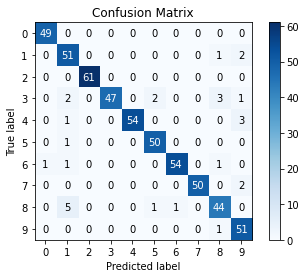

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.908751  0.026719  0.904272  0.033086  0.892573  0.049976


In [12]:
# Building Perceptron model with hold-out
hold_out_perceptron( 0.0001, 1000, None, X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 0.0001, 1000, None, X, y )

### Test 2

- Learning rate: 0.001
- Number of epochs: 1000
- Penalty: None

Performance with Hold-Out
Accuracy:  0.9462962962962963


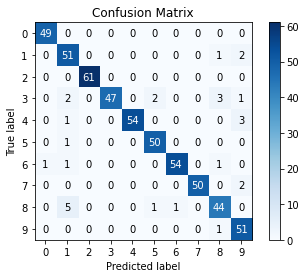

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg  cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.910418  0.02758  0.903716  0.033594  0.892573  0.049976


In [13]:
# Building Perceptron model with hold-out
hold_out_perceptron( 0.001, 1000, None, X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 0.001, 1000, None, X, y )

### Test 3

- Learning rate: 0.01
- Number of epochs: 1000
- Penalty: None

Performance with Hold-Out
Accuracy:  0.9333333333333333


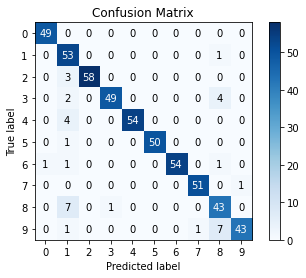

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.903174  0.032468  0.892032  0.035837  0.885906   0.04645


In [14]:
# Building Perceptron model with hold-out
hold_out_perceptron( 0.01, 1000, None, X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 0.01, 1000, None, X, y )

### Test 4

- Learning rate: 0.1
- Number of epochs: 1000
- Penalty: None

Performance with Hold-Out
Accuracy:  0.95


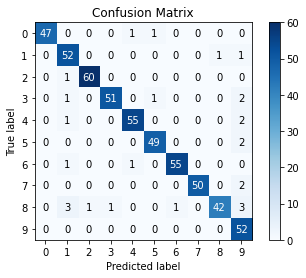

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.905964  0.030187  0.900379  0.024219  0.904252  0.038136


In [15]:
# Building Perceptron model with hold-out
hold_out_perceptron( 0.1, 1000, None, X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 0.1, 1000, None, X, y )

### Test 5

- Learning rate: 1.0
- Number of epochs: 1000
- Penalty: None

Performance with Hold-Out
Accuracy:  0.9537037037037037


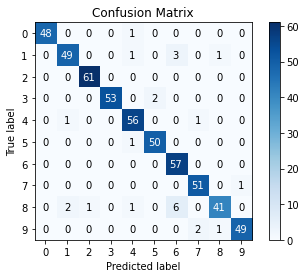

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg  cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.910984  0.02769  0.907629  0.019703  0.910931   0.03928


In [16]:
# Building Perceptron model with hold-out
hold_out_perceptron( 1.0, 1000, None, X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 1.0, 1000, None, X, y )

### Test 6

- Learning rate: 0.0001
- Number of epochs: 10000
- Penalty: None

Performance with Hold-Out
Accuracy:  0.9462962962962963


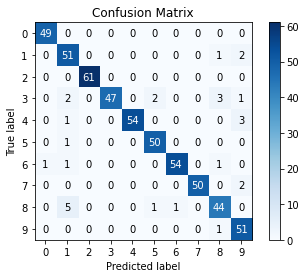

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.908751  0.026719  0.904272  0.033086  0.892573  0.049976


In [17]:
# Building Perceptron model with hold-out
hold_out_perceptron( 0.0001, 10000, None, X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 0.0001, 10000, None, X, y )

### Test 7

- Learning rate: 0.0001
- Number of epochs: 100
- Penalty: None

Performance with Hold-Out
Accuracy:  0.9462962962962963


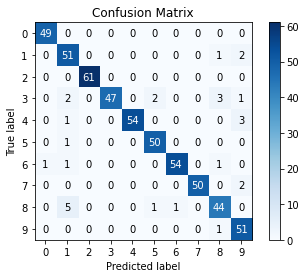

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.908751  0.026719  0.904272  0.033086  0.892573  0.049976


In [18]:
# Building Perceptron model with hold-out
hold_out_perceptron( 0.0001, 100, None, X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 0.0001, 100, None, X, y )

### Test 8

- Learning rate: 1.0
- Number of epochs: 1000
- Penalty: l1

Performance with Hold-Out
Accuracy:  0.9481481481481482


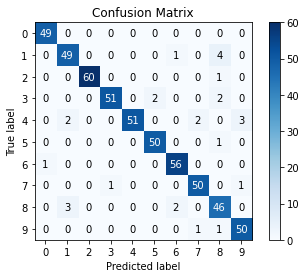

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.894307  0.043296  0.915967  0.024632  0.915394  0.029682


In [22]:
# Building Perceptron model with hold-out
hold_out_perceptron( 1.0, 1000, 'l1', X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 1.0, 1000, 'l1', X, y )

### Test 9

- Learning rate: 1.0
- Number of epochs: 1000
- Penalty: l2

Performance with Hold-Out
Accuracy:  0.9148148148148149


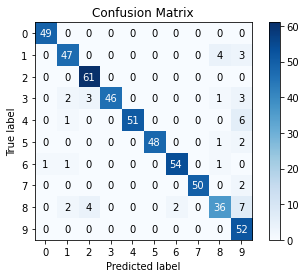

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.893712  0.025323  0.881477  0.021502  0.887014  0.046911


In [20]:
# Building Perceptron model with hold-out
hold_out_perceptron( 1.0, 1000, 'l2', X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 1.0, 1000, 'l2', X, y )

### Test 10

- Learning rate: 1.0
- Number of epochs: 1000
- Penalty: elasticnet

Performance with Hold-Out
Accuracy:  0.9148148148148149


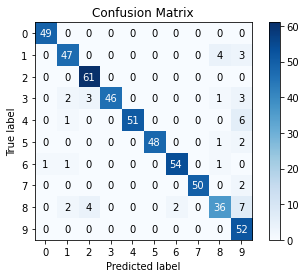

<Figure size 864x576 with 0 Axes>

Performance with Cross Validation
    cv5_avg   cv5_std   cv7_avg   cv7_std  cv10_avg  cv10_std
0  0.893712  0.025323  0.881477  0.021502  0.887014  0.046911


In [21]:
# Building Perceptron model with hold-out
hold_out_perceptron( 1.0, 1000, 'elasticnet', X_train, X_test, y_train, y_test )

# Building Perceptron model with cross validation
cross_validation_perceptron( 1.0, 1000, 'elasticnet', X, y )

### Results

In [32]:
results = {
    'Learning rate': [0.0001, 0.001, 0.01, 0.1, 1.0, 0.0001, 0.0001, 1.0, 1.0, 1.0],
    'Epochs': [1000, 1000, 1000, 1000, 1000, 10000, 100, 1000, 1000, 1000],
    'Penalty': ['-', '-', '-', '-', '-', '-', '-', 'l1', 'l2', 'elasticnet'],
    'Accuracy hold-out': [0.94, 0.94, 0.93, 0.95, 0.95, 0.94, 0.94, 0.94, 0.91, 0.91],
    'Accuracy cv5': [0.908751, 0.910418, 0.903174, 0.905964, 0.910984, 0.908751, 0.908751, 0.894307, 0.893712, 0.893712],
    'Accuracy cv7': [0.904272, 0.903716, 0.892032, 0.900379, 0.907629, 0.904272, 0.904272, 0.915967, 0.881477, 0.881477],
    'Accuracy cv10': [0.892573, 0.892573, 0.885906, 0.904252, 0.910931, 0.892573, 0.892573, 0.915394, 0.887014, 0.887014],
}

pd.DataFrame(results)

,Learning rate,Epochs,Penalty,Accuracy hold-out,Accuracy cv5,Accuracy cv7,Accuracy cv10
0,0.0001,1000,-,0.94,0.908751,0.904272,0.892573
1,0.0010,1000,-,0.94,0.910418,0.903716,0.892573
2,0.0100,1000,-,0.93,0.903174,0.892032,0.885906
3,0.1000,1000,-,0.95,0.905964,0.900379,0.904252
4,1.0000,1000,-,0.95,0.910984,0.907629,0.910931
5,0.0001,10000,-,0.94,0.908751,0.904272,0.892573
6,0.0001,100,-,0.94,0.908751,0.904272,0.892573
7,1.0000,1000,l1,0.94,0.894307,0.915967,0.915394
8,1.0000,1000,l2,0.91,0.893712,0.881477,0.887014
9,1.0000,1000,elasticnet,0.91,0.893712,0.881477,0.887014


# 4.0. Majority error

In [39]:
y = pd.DataFrame(y)

errors = (y[0].value_counts() / y.shape[0]).sort_values( ascending=False )

errors

3    0.101836
1    0.101280
5    0.101280
4    0.100723
6    0.100723
9    0.100167
7    0.099610
0    0.099054
2    0.098497
8    0.096828
Name: 0, dtype: float64

In [40]:
1 - errors[0]

0.900946021146355